In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker


In [46]:
plt.rcParams.update({
    "axes.labelsize":20,
    "xtick.labelsize":16,
    "ytick.labelsize":16,
    "legend.fontsize":16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

# inference time gpu

In [47]:
df = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/speed_gpu.txt')
df['TimeTaken(s)'] = df['TimeTaken(s)'].astype(float)
df['ModelType'] = df['ModelType'].replace('ABB3', 'Paragraph')
df['ModelType'] = df['ModelType'].replace('Small', 'Paraplume-S')
df['ModelType'] = df['ModelType'].replace('Large', 'Paraplume')


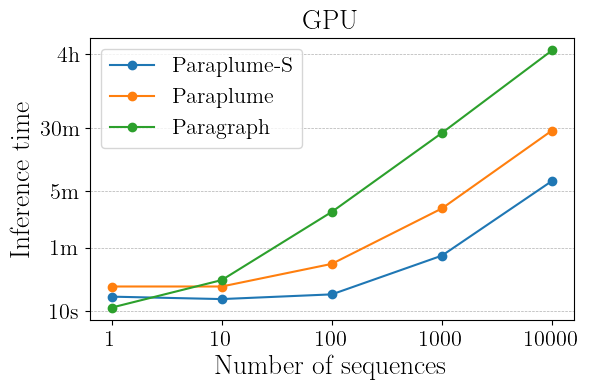

In [48]:

plt.figure(figsize=(6, 4))
for model in df['ModelType'].unique():
    subset = df[df['ModelType'] == model]
    plt.plot(subset['Size'], subset['TimeTaken(s)'], marker='o', label=model)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size (log scale)')
plt.ylabel('Time Taken')

def seconds_to_label(seconds):
    if seconds < 60:
        return f"{int(seconds)}s"
    if seconds < 3600:
        return f"{int(seconds // 60)}m"
    return f"{int(seconds // 3600)}h"

y_ticks = [10, 60, 300, 1800, 14400]

ax = plt.gca()

# Set Y-axis
ax.set_yticks(y_ticks)
ax.set_yticklabels([seconds_to_label(s) for s in y_ticks])
ax.yaxis.set_minor_locator(ticker.NullLocator())
ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

# Set X-axis ticks explicitly at powers of 10
x_ticks = [1, 10, 100, 1000, 10000]
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(x) for x in x_ticks])
ax.xaxis.set_minor_locator(ticker.NullLocator())

# Optional: turn on x-axis grid if needed
# ax.xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

# Final touches
plt.legend()
plt.title("GPU", fontsize=20)
plt.xlabel("Number of sequences")
plt.ylabel("Inference time")

plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/time_gpu.png", bbox_inches='tight')
plt.show()


# speed cpu

In [49]:
df = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/speed_cpu.txt')
df['TimeTaken(s)'] = df['TimeTaken(s)'].astype(float)
df['ModelType'] = df['ModelType'].replace('ABB3', 'Paragraph')
df['ModelType'] = df['ModelType'].replace('Small', 'Paraplume-S')
df['ModelType'] = df['ModelType'].replace('Large', 'Paraplume')

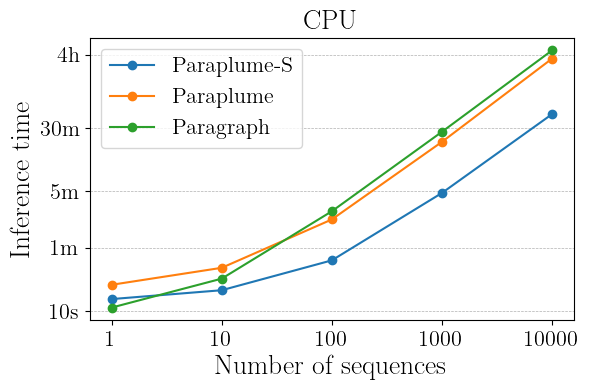

In [50]:

plt.figure(figsize=(6, 4))
for model in df['ModelType'].unique():
    subset = df[df['ModelType'] == model]
    plt.plot(subset['Size'], subset['TimeTaken(s)'], marker='o', label=model)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Size (log scale)')
plt.ylabel('Time Taken')

def seconds_to_label(seconds):
    if seconds < 60:
        return f"{int(seconds)}s"
    if seconds < 3600:
        return f"{int(seconds // 60)}m"
    return f"{int(seconds // 3600)}h"

y_ticks = [10, 60, 300, 1800, 14400]

ax = plt.gca()

# Set Y-axis
ax.set_yticks(y_ticks)
ax.set_yticklabels([seconds_to_label(s) for s in y_ticks])
ax.yaxis.set_minor_locator(ticker.NullLocator())
ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

# Set X-axis ticks explicitly at powers of 10
x_ticks = [1, 10, 100, 1000, 10000]
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(x) for x in x_ticks])
ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.legend()
plt.title("CPU", fontsize=20)
plt.xlabel("Number of sequences")
plt.ylabel("Inference time")

plt.tight_layout()
plt.savefig("/home/athenes/Paraplume/data_with_scripts/plots/time_cpu.png", bbox_inches='tight')
plt.show()

# emission cpu

In [51]:
df = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/emissions_cpu.csv')
df["model"]=df["project_name"]+"-"+df["experiment_id"].apply(lambda x:"large" if x.split("_")[2]=='True' else "small")
df["model"]=df["model"].replace("ParatopePrediction-small","Paraplume-S")
df["model"]=df["model"].replace("ParatopePrediction-large","Paraplume")
df["model"]=df["model"].replace("ABB3_prediction_cpu-small","Paragraph")

In [52]:
df["size"]=df["experiment_id"].apply(lambda x:x.split("_")[1]).astype(float)

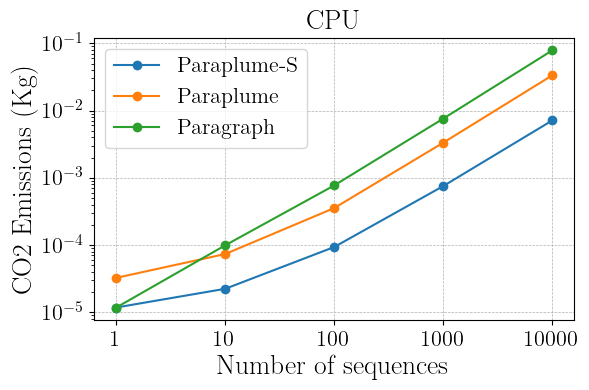

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker

# Ensure df is defined
# df = pd.read_csv('your_file.csv')  # Uncomment and load your data if needed

plt.figure(figsize=(6, 4))
for model in df['model'].unique():
    subset = df[df['model'] == model]
    plt.plot(subset['size'], subset['emissions'], marker='o', label=model)

# Log-log scale
plt.xscale('log')
plt.yscale('log')

# Get current axis
ax = plt.gca()

# Explicit X ticks at powers of 10
x_ticks = [1, 10, 100, 1000, 10000]
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(x) for x in x_ticks])
ax.xaxis.set_minor_locator(ticker.NullLocator())

# Labels and formatting
plt.xlabel("Number of sequences")
plt.ylabel("CO2 Emissions (Kg)")
plt.title("CPU", fontsize=20)
plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# emission gpu

In [54]:
df = pd.read_csv('/home/athenes/Paraplume/data_with_scripts/speed_tests/emissions_gpu.csv')
df["model"]=df["project_name"]+"-"+df["experiment_id"].apply(lambda x:"large" if x.split("_")[2]=='True' else "small")
df["model"]=df["model"].replace("ParatopePrediction-small","Paraplume-S")
df["model"]=df["model"].replace("ParatopePrediction-large","Paraplume")
df["model"]=df["model"].replace("ABB3_prediction_gpu-large","Paragraph")

In [55]:
df["size"]=df["experiment_id"].apply(lambda x:x.split("_")[1]).astype(float)

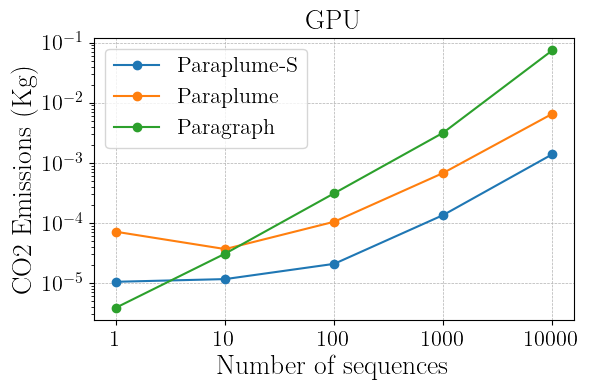

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker

# Ensure df is defined
# df = pd.read_csv('your_file.csv')  # Uncomment and load your data if needed

plt.figure(figsize=(6, 4))
for model in df['model'].unique():
    subset = df[df['model'] == model]
    plt.plot(subset['size'], subset['emissions'], marker='o', label=model)

# Log-log scale
plt.xscale('log')
plt.yscale('log')

# Get current axis
ax = plt.gca()

# Explicit X ticks at powers of 10
x_ticks = [1, 10, 100, 1000, 10000]
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(x) for x in x_ticks])
ax.xaxis.set_minor_locator(ticker.NullLocator())

# Labels and formatting
plt.xlabel("Number of sequences")
plt.ylabel("CO2 Emissions (Kg)")
plt.title("GPU", fontsize=20)
plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
